##### Pokémmons: Franquia centrada em criaturas ficcionais que os seres humanos capturam e os treinam para lutarem entre si com seus ataques de diversos tipos. Criada em 1995

###### Poke = Pocket | Mon = Monster | Pocket Monster 

###### Jogos, Cartas Colecionáveis, Série de televisão, filmes, mangás e Brinquedos

###### Segunda maior franquia de mídia de jogos mais bem sucedida da história

###### Pertence a Nintendo

###### Objetivos dos treinadores Pokemon: 1- Colecionar todas as espécies de pokemon| 2- Treinar a melhor equipe de pokemons para se tornar o treinador mais forte

###### (Pré-suposto que os nossos adversários são apenas as equipes do geração caldeira, as análises foram baseadas em equipes de pokemons em nível inicial)

###### Speed: Característica mais importante , against equilibrado, ataque e defesa

###### Cada jogo apresenta um caminho linear através de uma região específica do mundo Pokémon para o Treinador viajar, competindo em eventos e batalhando contra oponentes ao longo do caminho

In [1]:
#Metódos utilizados: exploração e visualização de tabelas através de gráficos, ferramentas de seleção de atributos aleatória e ferramentas de re-escala de valores

#importando dataset e visualizando
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import random
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

df_boss_2 = pd.read_csv('df_boss_2.csv')
df_boss_2

,Unnamed: 0,pokedex_number,name,generation,status,species,type_number,type_1,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,45.0,49.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,60.0,62.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,80.0,82.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,39.0,52.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,5,5,Charmeleon,1,Normal,Flame Pokémon,1,Fire,58.0,64.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,1017,883,Arctovish,8,Normal,Fossil Pokémon,2,Water,90.0,90.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
868,1018,884,Duraludon,8,Normal,Alloy Pokémon,2,Steel,70.0,95.0,...,2.0,0.5,0.5,0.5,0.5,1.0,1.0,1.0,0.5,1.0
869,1019,885,Dreepy,8,Normal,Lingering Pokémon,2,Dragon,28.0,60.0,...,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0
870,1020,886,Drakloak,8,Normal,Caretaker Pokémon,2,Dragon,68.0,80.0,...,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0


In [2]:
df_boss_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        872 non-null    int64  
 1   pokedex_number    872 non-null    int64  
 2   name              872 non-null    object 
 3   generation        872 non-null    int64  
 4   status            872 non-null    object 
 5   species           872 non-null    object 
 6   type_number       872 non-null    int64  
 7   type_1            872 non-null    object 
 8   hp                872 non-null    float64
 9   attack            872 non-null    float64
 10  defense           872 non-null    float64
 11  speed             872 non-null    float64
 12  against_normal    872 non-null    float64
 13  against_fire      872 non-null    float64
 14  against_water     872 non-null    float64
 15  against_electric  872 non-null    float64
 16  against_grass     872 non-null    float64
 1

In [3]:
#872 pokemons analisados
#          hp	     attack	     defense	  speed
# Media:65.989679	73.941514	69.592890	63.684633	
df_boss_2.describe()

,Unnamed: 0,pokedex_number,generation,type_number,hp,attack,defense,speed,against_normal,against_fire,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,...,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,502.268349,428.016055,4.001147,1.500000,65.989679,73.941514,69.592890,63.684633,0.873280,1.135894,...,1.081995,1.178039,0.993406,0.992546,1.256881,0.975917,0.966743,1.049885,0.979071,1.064794
std,297.710578,260.050816,2.257021,0.500287,24.151714,28.189982,28.036193,27.009210,0.284245,0.716499,...,0.783009,0.584601,0.494255,0.583156,0.696542,0.534133,0.339743,0.412498,0.490355,0.512153
min,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,239.750000,198.750000,2.000000,1.000000,50.000000,55.000000,50.000000,43.000000,1.000000,0.500000,...,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,503.500000,424.500000,4.000000,1.500000,65.000000,70.000000,65.000000,60.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,763.250000,657.250000,6.000000,2.000000,76.000000,92.000000,85.000000,83.250000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1021.000000,887.000000,8.000000,2.000000,255.000000,165.000000,230.000000,160.000000,1.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,4.000000,4.000000


In [4]:
df_boss_2['generation'].value_counts()

generation
1    172
5    150
3    130
4    100
2     94
8     82
6     75
7     69
Name: count, dtype: int64

In [5]:
# Utilizado os métodos de re-escala nos atributos de ataque, defesa e velocidade. Para assim haver uma comparação mais justa entre cada atributo, levando em conta que todos possuem o mesmo peso para análise


scaler = MinMaxScaler()

df_boss_2[['attack']] = scaler.fit_transform(df_boss_2[['attack']]) * 100
df_boss_2[['defense']] = scaler.fit_transform(df_boss_2[['defense']]) * 100
df_boss_2[['speed']] = scaler.fit_transform(df_boss_2[['speed']]) * 100

##### Podemos notar que apesar de algumas gerações se sobressairem sobre as outras em algumas características. Os pokemons ao longo das gerações sempre foram bem balanciados, isso se dá 
##### por conta dos desenvolvedores e criadores da franquia, que tem o intuito de manter os pokemons mais antigos vivos e utilizáveis ao longo do tempo. Por isso, mesmo com pokemons mais novos,
##### A escolha de um pokemon das primeiras gerações ainda é válida. Assim mantendo um ecossistema grande de pokemons

In [6]:
fig = go.Figure()

df_boss_2[['attack','defense','speed']] = df_boss_2[['attack','defense','speed']].astype(int)
df_boss_2['generation'] = df_boss_2['generation'].astype(str)
media_atributos = df_boss_2.groupby('generation')[['attack', 'defense', 'speed']].mean().reset_index()
media_atributos = media_atributos.set_index(media_atributos['generation'])
media_atributos['contagem_valores'] = df_boss_2['generation'].value_counts()
media_atributos = media_atributos.reset_index(drop=True)
geracao = media_atributos['generation']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
media_atributos
fig.add_trace(go.Bar(x=media_atributos['generation'],y=media_atributos['contagem_valores'],marker=dict(color=colors), showlegend=False))
fig.add_trace(go.Scatter(x=media_atributos['generation'],y=media_atributos['attack'], name='Ataque', line=dict(color='black')))
fig.add_trace(go.Scatter(x=media_atributos['generation'],y=media_atributos['defense'], name='Defesa'))
fig.add_trace(go.Scatter(x=media_atributos['generation'],y=media_atributos['speed'], name= 'Velocidade'))

fig.update_layout(title='Atributos das gerações de pokemon', yaxis_title = 'Quantidade de pokemons',xaxis_title = 'Geração do Pokemon')
fig.update_layout( 
    title={
        'text': 'Atributos das gerações de pokemon',
        'font': {'size': 35, 'family': 'Arial', 'color': 'black'}
    },
    xaxis_title={
        'text': 'Geração do Pokemon',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    yaxis_title={
        'text': 'Quantidade de pokemons',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    legend=dict(font={'size': 15, 'weight': 'bold'}),
    width=700,
    height=550,
)
# Primeira e Quinta geração possuem as maiores adições de pokemons
#Quinta e sétima geração possui pokemons com maior media de ataque
#Primeira geração possui os pokemons mais rapidos
#Sexta geração possui as melhores defesas  

In [7]:
#Pokemons do tipo Water são os mais comuns
#Pokemons do tipo Normal são os segundos mais comuns
#Pokemons do tipo Flying são os pokemons mais raros

df_boss_2['type_1'].value_counts()

type_1
Water       120
Normal      105
Grass        82
Bug          74
Fire         55
Electric     52
Rock         52
Psychic      47
Dark         38
Ground       37
Ghost        37
Poison       35
Ice          33
Fighting     33
Steel        24
Dragon       23
Fairy        19
Flying        6
Name: count, dtype: int64

In [8]:
# Podemos observar que o tipo Fighting e Dragon possuem os atributos de ataque muito acima da média dos demais tipos 
# O tipo Rock possui o pokemon com maior ataque (100)
# Os tipos normal e ice possuem os pokemons com segundo maior ataque (96)
# O tipo normal possui um pokemon que não ataca

fig_box1 = px.box(df_boss_2, x='type_1', y='attack', title='Diferentes tipo de Pókemons e seu Ataque',color='type_1', labels={
    'type_1': 'Tipo de Pókemon',
    'attack': 'Valor de Ataque'
})
fig_box1.update_layout( 
    title={
        'text': 'Diferentes tipo de Pókemons e seu Ataque',
        'font': {'size': 35, 'family': 'Arial', 'color': 'black'}
    },
    xaxis_title={
        'text': 'Tipo de Pokémon',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    yaxis_title={
        'text': 'Valor de Ataque',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    legend=dict(font={'size': 15, 'weight': 'bold'}),
)
fig_box1.update_xaxes(tickfont=dict(size=15))
fig_box1.update_yaxes(tickfont=dict(size=15))

In [9]:
#O tipo steel possui pokemons com defesas acima da maior parte do pokemons
#O tipo bug possui o pokemon com melhor defesa(99)


fig_box2 = px.box(df_boss_2, x='type_1', y='defense', title='Diferentes tipo de Pókemons e sua Defesa', color= 'type_1',labels={
    'type_1': 'Tipo de Pókemon',
    'defense': 'Valor de Defesa'
})
fig_box2.update_layout( 
    title={
        'text': 'Diferentes tipo de Pókemons e sua Defesa',
        'font': {'size': 35, 'family': 'Arial', 'color': 'black'}
    },
    xaxis_title={
        'text': 'Tipo de Pokémon',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    yaxis_title={
        'text': 'Valor de Defesa',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    legend=dict(font={'size': 15, 'weight': 'bold'})
)
fig_box2.update_xaxes(tickfont=dict(size=15))
fig_box2.update_yaxes(tickfont=dict(size=15))

In [10]:
#Ponto crucial para nossa analise
#Tipo bug possui o pokemon com maior velocidade
#Eletric e Fire possuem a maior parte de seus pokemons acima da média geral de velocidade


fig_box3 = px.box(df_boss_2, x='type_1', y='speed', title='Diferentes tipo de Pókemons e sua Velocidade', color='type_1', labels={
    'type_1': 'Tipo de Pókemon',
    'speed': 'Valor de Valocidade'
})
fig_box3.update_layout( 
    title={
        'text': 'Diferentes tipo de Pókemons e sua Velocidade',
        'font': {'size': 35, 'family': 'Arial', 'color': 'black'}
    },
    xaxis_title={
        'text': 'Tipo de Pokémon',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    yaxis_title={
        'text': 'Valor da Velocidade',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    legend=dict(font={'size': 15, 'weight': 'bold'})
)
fig_box3.update_xaxes(tickfont=dict(size=15))
fig_box3.update_yaxes(tickfont=dict(size=15))

In [11]:
# Selecionamos 10 tipos aleatórios de pokemons toda vez que desejamos selecionar uma nova equipe
# O intuito do nosso algoritimo é que independente dos pokemons disponíveis no momento, ele nos retorne os pokemons mais proximos das características que buscamos

# Cada tipo de pokemon possui vantagens contra certos tipos e desvantagens contra outros. Isso é informado pela característica against
# Em seguida criamos uma média para o against de cada pokemon, que diz o quao forte ele é contra a variedade de tipos de pokemons. Sendo que quanto maior o valor, melhor ele se sai contra a diversidade de tipos de pokemons
# O intuito é encontrar o pokemons que possuem mais vantagens e menos desvantagens em relação aos outros

# Fizemos uma análise e concluímos que o atributo mais importante é a velocidade, pois com ela, um pokemon tem a capacidade de desviar de ataques do oponente, independente do tipo e possui a capacidade de atacar mais rapido
# Assim fazendo a diferença tanto no ataque quanto na defesa de um pokemon


# O segundo atributo mais importante é a média do against
# Pois é ele que vai determinar o quão bem o pokemon vai se sair em relação aos outros pokemons, e como buscamos uma equipe para vencer o campeonato regional é crucial termos uma equipe equilibrada para bater de frente contra qualquer tipo de pokemon

# Utilizamos uma métrica ponderada para definir o peso de cada atributo na nossa escolha
# reescala da media do against, para que ele possua pesos iguais aos outros atributos, e que apenas a nossa métrica ponderada possa interferir no peso de uma característica

tipos_aleatorios = random.sample(df_boss_2['type_1'].unique().tolist(), 10)

lista_tipos = []

for tipo in tipos_aleatorios:
    pokemons_do_tipo = df_boss_2[df_boss_2['type_1'] == tipo].sample(n=3,random_state=1)
    lista_tipos.append(pokemons_do_tipo)

resultado = pd.concat(lista_tipos)
resultado.sort_values('type_1')

colunas_against = [colunas for colunas in resultado.columns if 'against' in colunas]

resultado['against'] = resultado[colunas_against].mean(axis=1)

pesos = {'attack':0.15,'defense':0.15,'speed':0.40,'against':0.30}

scaler = MinMaxScaler()

resultado[['attack']] = scaler.fit_transform(resultado[['attack']])
resultado[['defense']] = scaler.fit_transform(resultado[['defense']])
resultado[['speed']] = scaler.fit_transform(resultado[['speed']])
resultado[['against']] = scaler.fit_transform(resultado[['against']])

resultado

,Unnamed: 0,pokedex_number,name,generation,status,species,type_number,type_1,hp,attack,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,against
458,528,447,Riolu,4,Normal,Emanation Pokémon,1,Fighting,40.0,0.413333,...,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0,0.581395
539,630,538,Throh,5,Normal,Judo Pokémon,1,Fighting,120.0,0.666667,...,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0,0.581395
79,86,67,Machoke,1,Normal,Superpower Pokémon,1,Fighting,80.0,0.666667,...,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0,0.581395
114,122,94,Gengar,1,Normal,Shadow Pokémon,2,Ghost,60.0,0.373333,...,1.0,2.0,0.25,1.00,2.0,1.0,2.0,1.0,0.5,0.395349
743,863,741,Oricorio Sensu Style,7,Normal,Dancing Pokémon,2,Ghost,75.0,0.413333,...,1.0,1.0,0.25,2.00,2.0,1.0,2.0,1.0,1.0,0.465116
219,241,200,Misdreavus,2,Normal,Screech Pokémon,1,Ghost,60.0,0.333333,...,1.0,1.0,0.50,1.00,2.0,1.0,2.0,1.0,1.0,0.255814
231,254,212,Scizor,2,Normal,Pincer Pokémon,2,Bug,70.0,0.920000,...,1.0,0.5,0.50,1.00,1.0,0.5,1.0,0.5,0.5,0.232558
603,694,596,Galvantula,5,Normal,EleSpider Pokémon,2,Bug,70.0,0.480000,...,1.0,1.0,1.00,2.00,1.0,1.0,1.0,0.5,1.0,0.441860
147,157,123,Scyther,1,Normal,Mantis Pokémon,2,Bug,70.0,0.746667,...,2.0,1.0,0.50,4.00,1.0,1.0,1.0,1.0,1.0,0.813953
123,132,103,Exeggutor,1,Normal,Coconut Pokémon,2,Grass,95.0,0.626667,...,2.0,0.5,4.00,1.00,2.0,1.0,2.0,1.0,1.0,1.000000


In [12]:
# Com todos as características sendo medidas de maneira igualitária, sendo interferidas apenas pela nossa métrica.
# Criamos uma pontuação para cada pokemon, aonde os que possuem as melhores pontuações são os que mais atendem as nossas métricas.

tipos = resultado['type_1']

selecao_tipos = []

for tipo in tipos:
    pokemons_do_tipo = resultado[resultado['type_1'] == tipo].sample(n=1,random_state=1)
    selecao_tipos.append(pokemons_do_tipo)

resultado['score'] = (
    resultado['attack'] * pesos['attack'] +
    resultado['defense'] * pesos['defense'] +
    resultado['speed'] * pesos['speed'] +
    resultado['against'] * pesos['against'] * 100)

selecao = resultado.sort_values('score',ascending=False)
selecao

,Unnamed: 0,pokedex_number,name,generation,status,species,type_number,type_1,hp,attack,...,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,against,score
123,132,103,Exeggutor,1,Normal,Coconut Pokémon,2,Grass,95.0,0.626667,...,0.5,4.00,1.00,2.0,1.0,2.0,1.0,1.0,1.000000,30.272988
147,157,123,Scyther,1,Normal,Mantis Pokémon,2,Bug,70.0,0.746667,...,1.0,0.50,4.00,1.0,1.0,1.0,1.0,1.0,0.813953,24.917569
560,651,555,Darmanitan Galarian Standard Mode,5,Normal,Zen Charm Pokémon,1,Ice,105.0,1.000000,...,1.0,1.00,2.00,1.0,1.0,1.0,2.0,1.0,0.767442,23.490756
498,588,497,Serperior,5,Normal,Regal Pokémon,1,Grass,75.0,0.453333,...,1.0,2.00,1.00,1.0,1.0,1.0,1.0,1.0,0.720930,22.134955
762,882,756,Shiinotic,7,Normal,Illuminating Pokémon,2,Grass,60.0,0.213333,...,1.0,1.00,1.00,1.0,0.0,0.5,2.0,1.0,0.720930,21.726871
720,830,715,Noivern,6,Normal,Sound Wave Pokémon,2,Flying,85.0,0.413333,...,1.0,0.50,2.00,1.0,2.0,1.0,1.0,2.0,0.651163,20.063848
384,432,365,Walrein,3,Normal,Ice Break Pokémon,2,Ice,110.0,0.493333,...,1.0,1.00,2.00,1.0,1.0,1.0,1.0,1.0,0.639535,19.484392
539,630,538,Throh,5,Normal,Judo Pokémon,1,Fighting,120.0,0.666667,...,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0,0.581395,17.674182
79,86,67,Machoke,1,Normal,Superpower Pokémon,1,Fighting,80.0,0.666667,...,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0,0.581395,17.655432
458,528,447,Riolu,4,Normal,Emanation Pokémon,1,Fighting,40.0,0.413333,...,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0,0.581395,17.649277


In [13]:
# Em seguida selecionamos a nossa equipe com 6 pokemons, de forma que os tipos não se repitam

tipos_unicos = set()
selecao_unica = []

for _, pokemon in resultado.iterrows():   
    tipos = [pokemon['type_1']]    
    for tipo in tipos:
        if tipo not in tipos_unicos and len(selecao_unica) < 6:
            tipos_unicos.add(tipo)
            selecao_unica.append(pokemon)
            break

selecao_unica

[Unnamed: 0                        528
 pokedex_number                    447
 name                            Riolu
 generation                          4
 status                         Normal
 species             Emanation Pokémon
 type_number                         1
 type_1                       Fighting
 hp                               40.0
 attack                       0.413333
 defense                         0.125
 speed                        0.316667
 against_normal                    1.0
 against_fire                      1.0
 against_water                     1.0
 against_electric                  1.0
 against_grass                     1.0
 against_ice                       1.0
 against_fight                     1.0
 against_poison                    1.0
 against_ground                    1.0
 against_flying                    2.0
 against_psychic                   2.0
 against_bug                       0.5
 against_rock                      0.5
 against_ghost           

#### Ao observar o gráfico em 3D, podemos notar que conseguimos uma equipe bem equilibrada, por conta das características de against e também os pokemons mais rapidos possíveis

In [14]:
fig_3d =px.scatter_3d(selecao_unica, 
            x='attack', 
            y='speed', 
            z='defense', 
            color='type_1', 
            title="Distribuição dos Pokémon Selecionados (Attack, Speed, Defense)",
            labels={ 
            'attack': 'Ataque', 
        'defense': 'Defesa', 
            'speed': 'Velocidade', 
            'type_1': 'Tipo de Pokémon'  
              })
fig_3d.update_layout( 
    title={
        'text': 'Distribuição dos Pokémon Selecioados (Attack, Speed, Defense)',
        'font': {'size': 30, 'family': 'Arial', 'color': 'black'}
    },
    xaxis_title={
        'text': 'attack',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    yaxis_title={
        'text': 'speed',
        'font': {'size': 26, 'family': 'Arial', 'color': 'black'}
    },
    legend=dict(font={'size': 15, 'weight': 'bold'})
)

fig_3d.update_xaxes(tickfont=dict(size=15))
fig_3d.update_yaxes(tickfont=dict(size=15))


In [15]:
# Aqui atribuimos uma variável para cada pokémon selecionado, para criar um gráfico com seus atributos against

selecao_unica = pd.DataFrame(selecao_unica)
poke_1 = pd.DataFrame(selecao_unica.iloc[0][colunas_against]).reset_index()
poke_1.columns = ['atributo', 'valor']

poke_2 = pd.DataFrame(selecao_unica.iloc[1][colunas_against]).reset_index()
poke_2.columns = ['atributo', 'valor']

poke_3 = pd.DataFrame(selecao_unica.iloc[2][colunas_against]).reset_index()
poke_3.columns = ['atributo', 'valor']

poke_4 = pd.DataFrame(selecao_unica.iloc[3][colunas_against]).reset_index()
poke_4.columns = ['atributo', 'valor']

poke_5 = pd.DataFrame(selecao_unica.iloc[4][colunas_against]).reset_index()
poke_5.columns = ['atributo', 'valor']

poke_6 = pd.DataFrame(selecao_unica.iloc[5][colunas_against]).reset_index()
poke_6.columns = ['atributo', 'valor']

In [16]:
px.line_polar(poke_1, r= 'valor', theta= 'atributo', line_close=True, title='Pokemon 1', template='plotly_dark').update_traces(fill='toself')

In [17]:
px.line_polar(poke_2, r= 'valor', theta= 'atributo', line_close=True, title='Pokemon 2', template='plotly_dark').update_traces(fill='toself')

In [18]:
px.line_polar(poke_3, r= 'valor', theta= 'atributo', line_close=True, title='Pokemon 3', template='plotly_dark').update_traces(fill='toself')

In [19]:
px.line_polar(poke_4, r= 'valor', theta= 'atributo', line_close=True, title='Pokemon 4', template='plotly_dark').update_traces(fill='toself')

In [20]:
px.line_polar(poke_5, r= 'valor', theta= 'atributo', line_close=True, title='Pokemon 5', template='plotly_dark').update_traces(fill='toself')

In [21]:
px.line_polar(poke_6, r= 'valor', theta= 'atributo', line_close=True, title='Pokemon 6', template='plotly_dark').update_traces(fill='toself')

In [22]:
selecao_unica['name']

458        Riolu
114       Gengar
231       Scizor
123    Exeggutor
443      Purugly
801     Rookidee
Name: name, dtype: object

Text(245.72222222222223, 0.5, 'Pokémons')

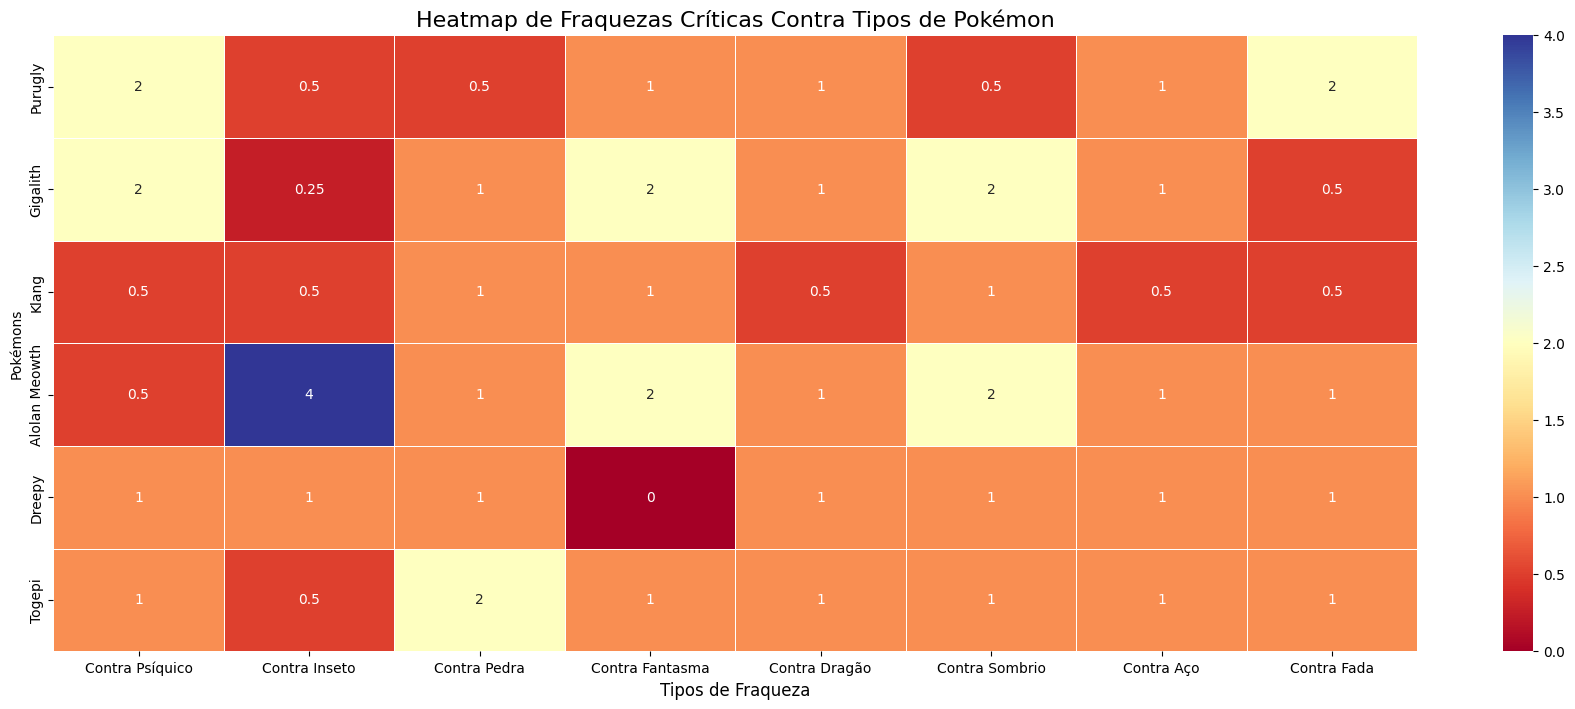

In [25]:
# Gráfico de todos os pokémons selecionados e suas características against

poke_labels = ['Purugly', 'Gigalith', 'Klang', 'Alolan Meowth', 'Dreepy', 'Togepi']

colunas_fraquezas = [
    'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 
    'against_dragon', 'against_dark', 'against_steel', 'against_fairy'

    # 'Contra Psíquico', 'Contra Inseto', 'Contra Pedra', 'Contra Fantasma', 
    # 'Contra Dragão', 'Contra Sombrio', 'Contra Aço', 'Contra Fada'
]
colunas_fraquezas_pt = [
    'Contra Psíquico', 'Contra Inseto', 'Contra Pedra', 'Contra Fantasma', 
    'Contra Dragão', 'Contra Sombrio', 'Contra Aço', 'Contra Fada'
]

plt.figure(figsize=(22, 8))

sns.heatmap(selecao_unica[colunas_fraquezas], 
            annot=True,
            cmap='RdYlBu',
            cbar=True,
            linewidths=0.5,
            vmin=0, vmax=4,
            yticklabels=poke_labels, 
            xticklabels=colunas_fraquezas_pt) 

plt.title('Heatmap de Fraquezas Críticas Contra Tipos de Pokémon', fontsize=16)
plt.xlabel('Tipos de Fraqueza', fontsize=12)
plt.ylabel('Pokémons')